# Step 1: Load and Preprocess Images

In [20]:
logs = [
    "log-20240306-043751",
    "log-20240313-102003",
    "log-20240313-114736",
    "log-20240313-160024",
    "log-20240313-171514",
    "log-20240313-183846",
    "log-20240313-200023",
    "log-20240313-212328",
    "log-20240313-224845",
    "log-20240314-000952",
    "log-20240314-120037",
    "log-20240314-132530",
    "log-20240314-144706",
    "log-20240314-160643",
    "log-20240314-172950",
    "log-20240314-184518",
    "log-20240315-095536",
    "log-20240315-111916",
    "log-20240316-033024",
    "log-20240316-063932",
    "log-20240316-080533",
    "log-20240316-093331",
    "log-20240316-105445",
    "log-20240316-122134",
    "log-20240316-150957",
    "log-20240316-163235",
    "log-20240316-175351",
    "log-20240316-192406",
    "log-20240317-040558",
    "log-20240317-053257",
    "log-20240317-065118",
    "log-20240317-080313",
    "log-20240317-104931"
]

categories = [
    "B", "A", "A", "A", "A", "A", "A", "B", "B", "A", "A", "B", "A", "A", "B", "A",
    "A", "A", "A", "A", "B", "A", "A", "B", "B", "B", "B", "A", "B", "A", "A", "B", "B"
]

# Create a dictionary mapping log entries to their categories
log_mapping = {log: category for log, category in zip(logs, categories)}

print(log_mapping["log-20240317-104931"])


B


In [21]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

folder_path = 'Data/Mode Multiplexers/bitmap'
images = []
labels = []
for filename in os.listdir(folder_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image = image.convert('L')
        image = image.resize((128,128))
        image_array = np.array(image)
        images.append(image_array[33:96,33:96])
        if log_mapping[filename[:-4]] == 'A':
            labels.append(0);
        else:
            labels .append(1)
        
labels = np.array(labels)
images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)
print("Total images loaded and preprocessed:", len(images))

Total images loaded and preprocessed: 33


# Step 2: Create binary classification model

In [22]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras import layers

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=16)

'''
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(63, 63, 1), padding="same"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.GlobalAveragePooling2D())
# Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])
''' 


'\nmodel = Sequential()\nmodel.add(layers.Conv2D(16, (3, 3), activation=\'relu\', input_shape=(63, 63, 1), padding="same"))\nmodel.add(layers.Conv2D(32, (3, 3), activation=\'relu\', padding="same"))\nmodel.add(layers.MaxPooling2D((2, 2), padding="same"))\nmodel.add(layers.GlobalAveragePooling2D())\n# Full connection\nmodel.add(layers.Dense(units = 512, activation = \'relu\'))\nmodel.add(layers.Dense(units = 1, activation = \'sigmoid\'))\n# Compiling the CNN\nmodel.compile(loss = \'binary_crossentropy\',\n              optimizer = \'adam\',\n              metrics = [\'acc\'])\n'

##### Improved Model Code

In [23]:
model = Sequential()

# Convolutional layers with increasing filters
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(63, 63, 1), padding="same"))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.MaxPooling2D((2, 2), padding="same"))

# Global average pooling and dense layers
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Added dropout to avoid overfitting
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 63, 63, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 63, 63, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 63, 63, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,409 (224.25 KB)

 Trainable params: 57,249 (223.63 KB)

 Non-trainable params: 160 (640.00 B)

# Step 3: Train model

In [25]:
import sys
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
dataset = tf.data.Dataset.from_tensors((X_train, y_train))
# Define the callbacks for early stopping of model based on val loss change.
tf.random.set_seed(0)
early_stopping = [EarlyStopping(monitor = 'val_loss', min_delta =  0.01, patience = 3)]
# Fitting the CNN
model.fit(dataset, epochs=30, callbacks = early_stopping)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step - accuracy: 0.3750 - loss: 0.7154
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.5403
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8333 - loss: 0.4634
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8333 - loss: 0.4109
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8750 - loss: 0.3671
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7917 - loss: 0.3554
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9167 - loss: 0.3236
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9167 - loss: 0.3163
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9167 - loss: 0.3100
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9167 - loss: 0.2779
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9167 - loss: 0.2778
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9167 - loss: 0.2429


#### [unimportant] Code for Checking the Conv Layers

In [27]:
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from lime import lime_image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import imageio
import os
import PIL
import cv2

In [28]:
for layer in model.layers:
    try:
        # Use layer.get_output_shape_at(0) to get the shape
        print(layer.name, layer.get_output_shape_at(0))
    except AttributeError:
        # For layers that don't have 'get_output_shape_at' (e.g., Input layers), we skip
        print(layer.name, "No output shape available")


conv2d_5 No output shape available
batch_normalization_2 No output shape available
conv2d_6 No output shape available
max_pooling2d_3 No output shape available
conv2d_7 No output shape available
batch_normalization_3 No output shape available
max_pooling2d_4 No output shape available
global_average_pooling2d_2 No output shape available
dense_4 No output shape available
dropout_1 No output shape available
dense_5 No output shape available


### My Code

##### Compute GradCAM Function -- ver1.0

In [33]:

from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from lime import lime_image

# Function to compute Grad-CAM
def compute_gradcam(model, image, Conv2D):
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(Conv2D).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(image, axis=0))
        loss = tf.reduce_mean(predictions)
    
    grads = tape.gradient(loss, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.dot(conv_outputs[0], weights)
    
    # Resize the CAM to match the input image size
    cam = cv2.resize(cam, (image.shape[1], image.shape[0]))
    
    # Apply ReLU to the CAM to remove negative values
    cam = np.maximum(cam, 0)
    
    # Normalize the CAM to the range [0, 1]
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    return heatmap

# Function to convert heatmap to binary mask
def convert_to_binary_mask(heatmap, threshold=0.5):
    # Apply threshold to create a binary mask
    mask = np.where(heatmap > threshold, 1, 0).astype(np.uint8)
    return mask

# Function to predict using the model for LIME
def predict_fn(images):
    images = images[:, :, :, 0]  # Extract the first channel if images are RGB
    images = images.reshape(images.shape[0], 63, 63, 1)  # Reshape to match model input
    features = model.predict(images)
    return features.reshape(features.shape[0], -1)  # Reshape to (num_samples, num_features)

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Dummy call to the model to initialize layer outputs
dummy_input = np.zeros((1, 63, 63, 1))  # Assuming input shape is (63, 63, 1)
model(dummy_input)  # Call the model once to define the layer outputs

# Use the MaxPooling2D layer ('max_pooling2d_6') for Grad-CAM
layer_name_for_gradcam = 'max_pooling2d_6'

i = 0

for image in images:
    sample_image = cv2.cvtColor((image.reshape(63, 63, 1) * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
    
    with SuppressOutput():
        explanation = explainer.explain_instance(
            sample_image.astype('double'),
            predict_fn,
            top_labels=1,
            hide_color=0,
            num_samples=1000
        )

        # Get the image and mask for the top label from LIME
        temp, lime_mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=True,
            num_features=10,
            hide_rest=False
        )

    # Compute Grad-CAM heatmap using the MaxPooling2D layer
    gradcam_heatmap = compute_gradcam(model, image.reshape(63, 63, 1), layer_name_for_gradcam)
    
    # Convert Grad-CAM heatmap to binary mask
    gradcam_binary_mask = convert_to_binary_mask(gradcam_heatmap, threshold=0.5)
    
    # Display the original image, LIME explanation, LIME mask, and Grad-CAM binary mask
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    
    # Original image
    ax1.imshow(sample_image[:, :, 0].reshape(63, 63), cmap='gray')
    ax1.set_title("Label: " + str(labels[i]))
    ax1.axis('off')
    
    # LIME explanation
    ax2.imshow(mark_boundaries(temp, lime_mask))
    ax2.set_title('LIME Explanation')
    ax2.axis('off')
    
    # LIME mask
    ax3.matshow(lime_mask)
    ax3.set_title('LIME Mask')
    ax3.axis('off')
    
    # Grad-CAM Binary Mask (similar to your provided image)
    ax4.matshow(gradcam_binary_mask)
    ax4.set_title('Grad-CAM Binary Mask')
    ax4.axis('off')
    
    i += 1

plt.show()



100%|██████████| 1000/1000 [00:03<00:00, 322.93it/s]


ValueError: No such layer: max_pooling2d_6. Existing layers are: ['conv2d_8', 'conv2d_9', 'max_pooling2d_5', 'global_average_pooling2d_3', 'dense_6', 'dense_7'].

#### Function to Compute Grad-CAM -- ver2.0

In [30]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def find_last_conv_layer(model):
    # Loop over the layers in reverse order to find the last convolutional layer
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            #print(layer.name)
            return layer.name
        
    print(layer.name)
    return layer.name


In [31]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras import layers

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=16)
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(63, 63, 1), padding="same"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.GlobalAveragePooling2D())
# Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

last_conv_layer_output = Conv2D
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer and predictions
    grad_model = Model(
        [model.inputs], [model.get_layer(last_conv_layer_output).output, model.output]
    )
    # Compute the gradient of the top predicted class with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # Compute the gradient of the class output value with respect to the feature map activations
    grads = tape.gradient(class_channel, last_conv_layer_output)
    # Pool the gradients over all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # Multiply each channel in the feature map array by "how important this channel is" with regard to the predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    # Normalize the heatmap between 0 and 1 for display
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())
    return heatmap.numpy()

In [32]:
def overlay_heatmap_on_image(img, heatmap, alpha=0.4):
    # Rescale heatmap to a range of 0-255 and convert to uint8
    heatmap = np.uint8(255 * heatmap)
    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    # Apply the colormap
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    # Superimpose the heatmap onto the original image
    superimposed_img = heatmap_colored * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    return superimposed_img

# Find the last convolutional layer in the model
last_conv_layer_name = find_last_conv_layer(model)
print("Last conv layer name:", last_conv_layer_name)

i = 0
for image in X_test:
    # Preprocess the image
    img_array = np.expand_dims(image, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Convert grayscale to match model input

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Convert the grayscale image to RGB for visualization
    sample_image = cv2.cvtColor((image.reshape(63, 63) * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

    # Overlay Grad-CAM heatmap on image
    overlay_image = overlay_heatmap_on_image(sample_image, heatmap)

    # Display the original image, Grad-CAM heatmap, and overlay
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    ax1.imshow(sample_image)
    ax1.set_title(f"Original Image (Label: {y_test[i]})")
    ax1.axis('off')

    # Grad-CAM heatmap
    ax2.imshow(heatmap, cmap='viridis')
    ax2.set_title('Grad-CAM Heatmap')
    ax2.axis('off')

    # Grad-CAM overlay on original image
    ax3.imshow(overlay_image)
    ax3.set_title('Overlay (Grad-CAM + Original)')
    ax3.axis('off')

    plt.show()
    i += 1


Last conv layer name: conv2d_9


UnboundLocalError: local variable 'last_conv_layer_output' referenced before assignment

#### Elaina's Code

100%|██████████| 1000/1000 [00:03<00:00, 300.91it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 1000/1000 [00:03<00:00, 304.86it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 1000/1000 [00:03<00:00, 330.81it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 1000/1000 [00:03<00:00, 323.97it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 1000/1000 [00:02<00:00, 334.80it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 1000/1000 [00:03<00:00, 321.15it/s]
Clipping inp

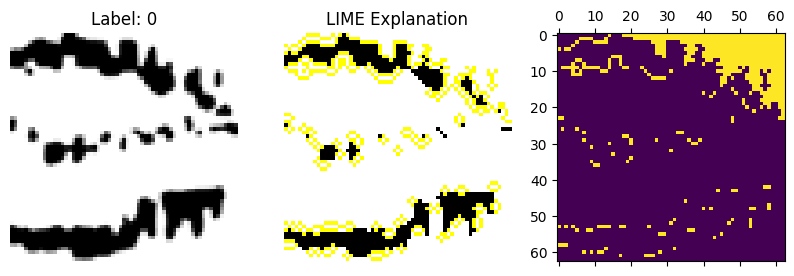

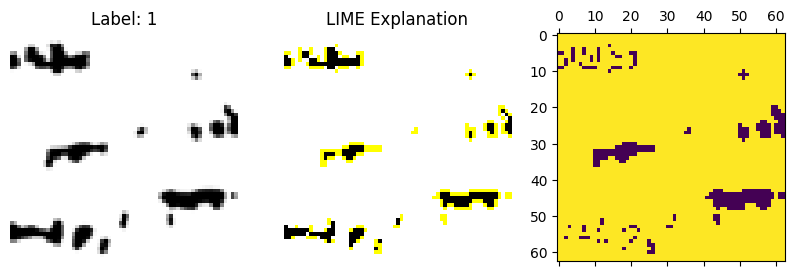

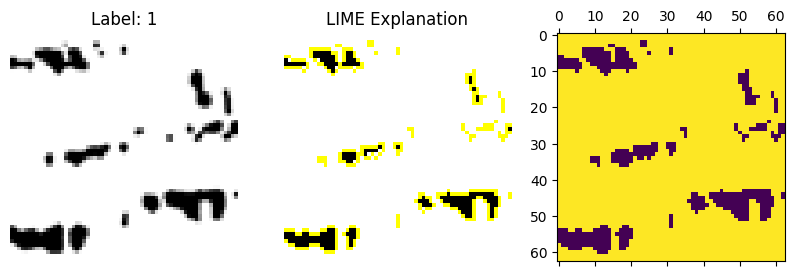

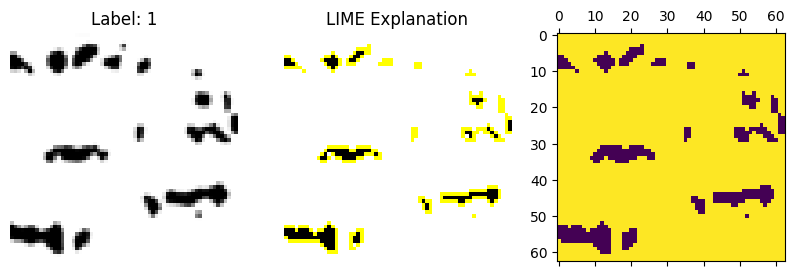

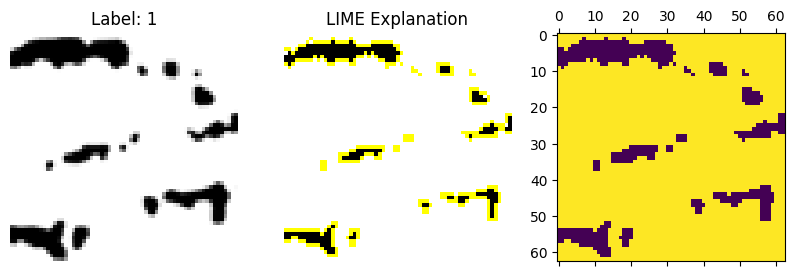

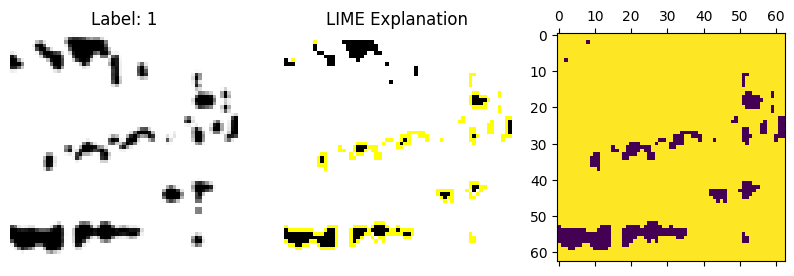

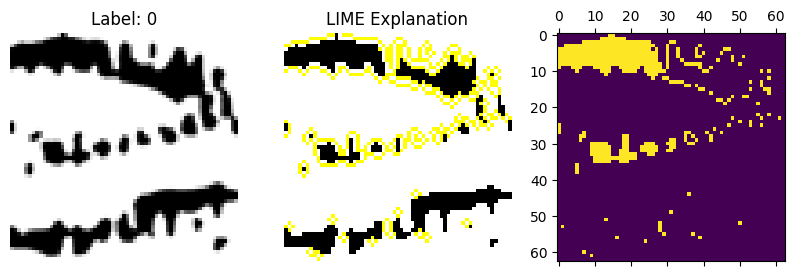

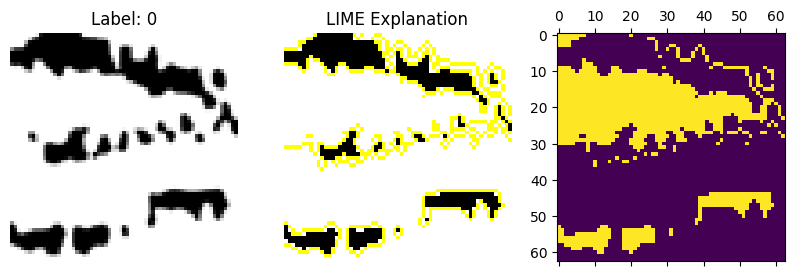

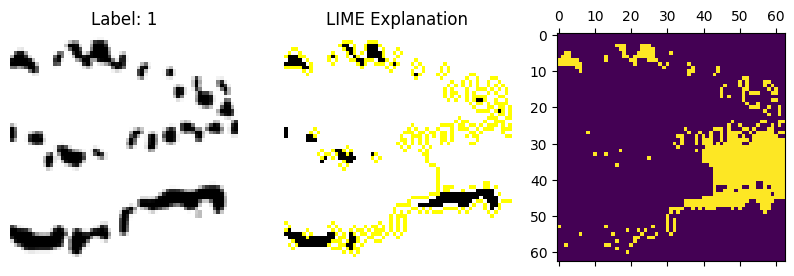

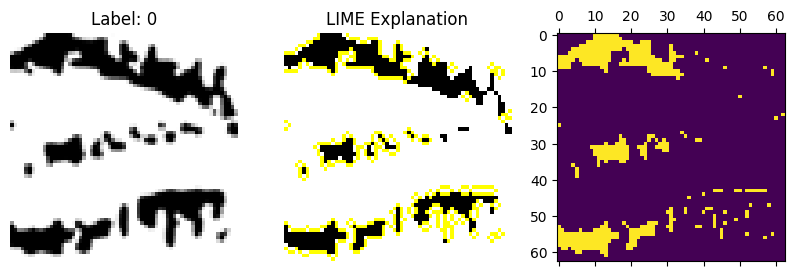

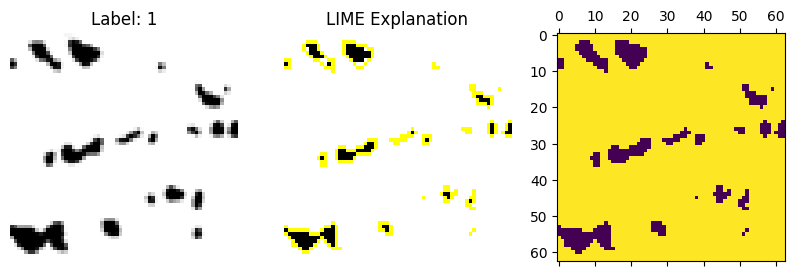

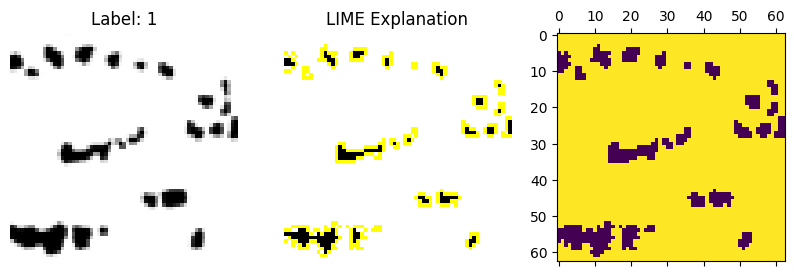

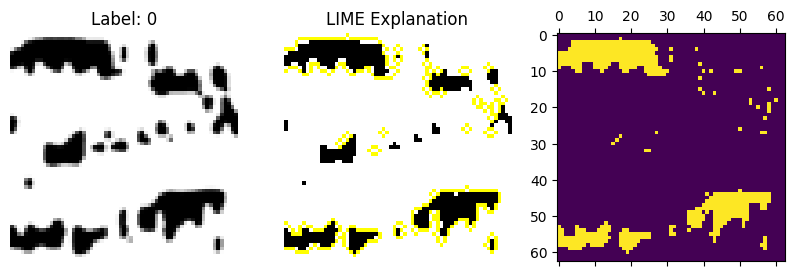

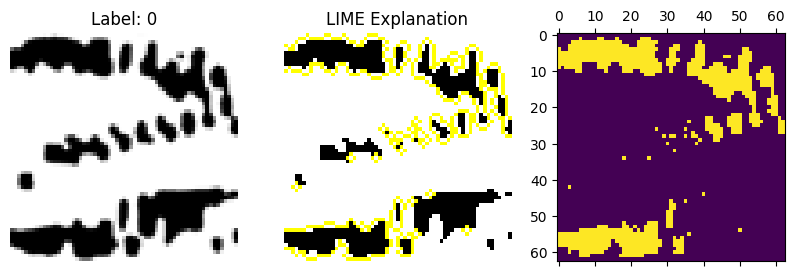

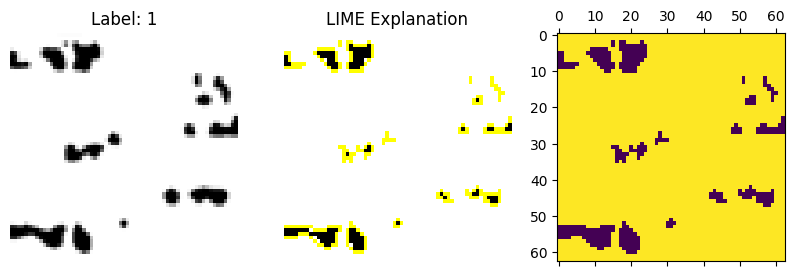

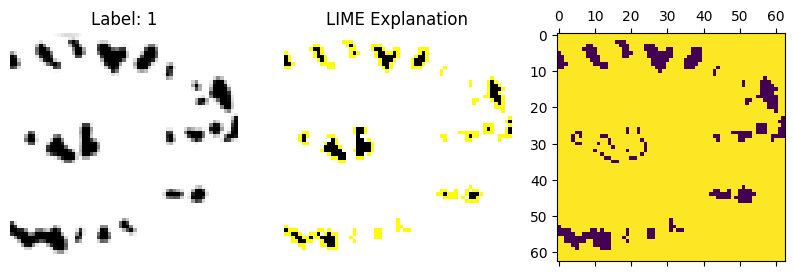

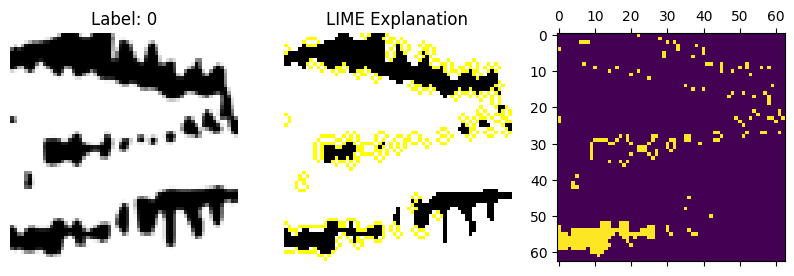

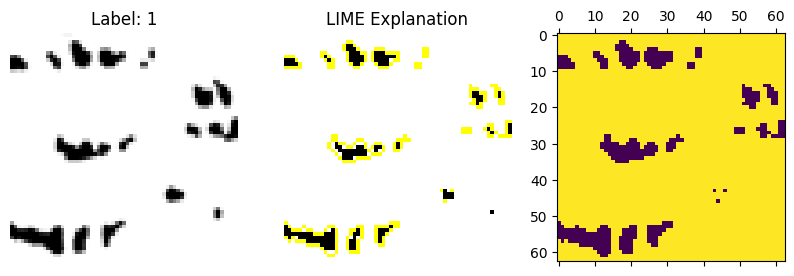

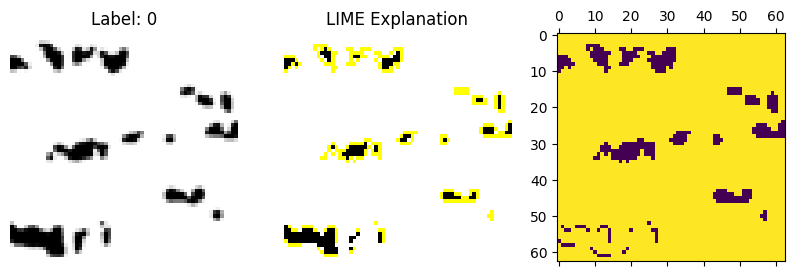

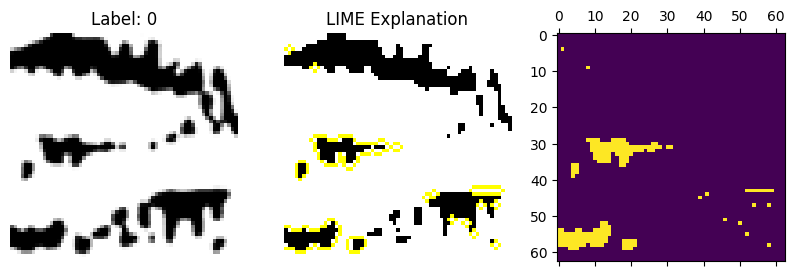

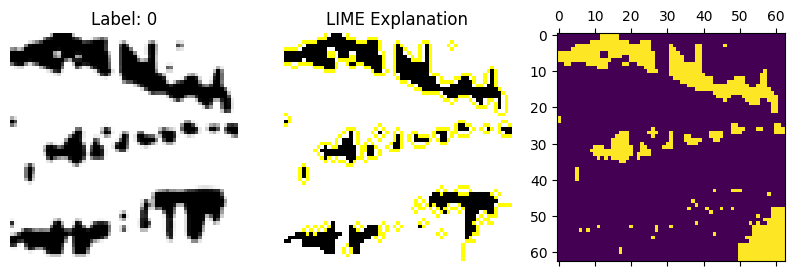

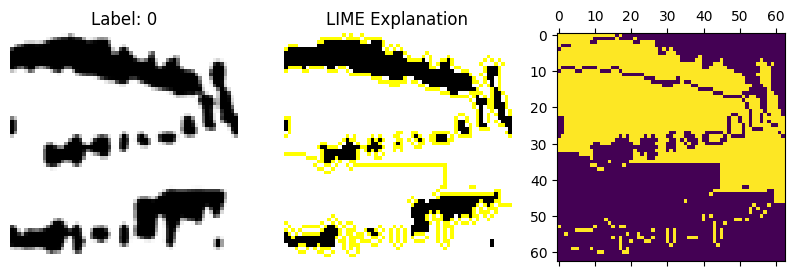

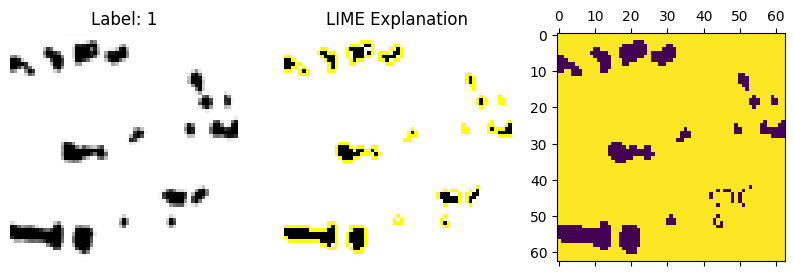

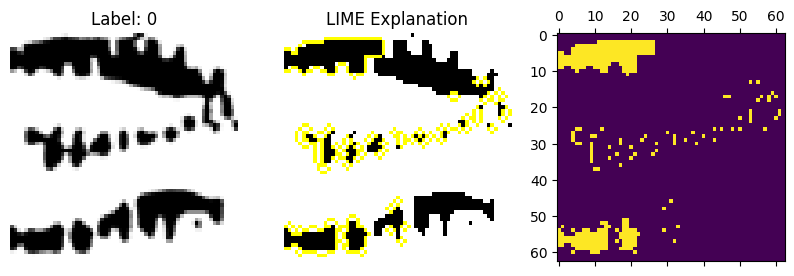

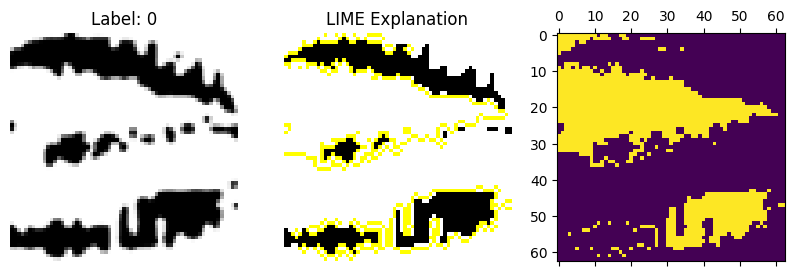

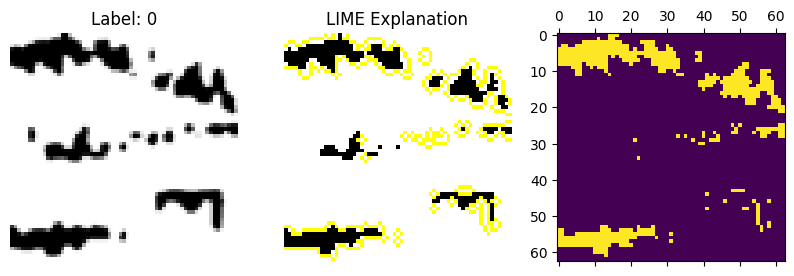

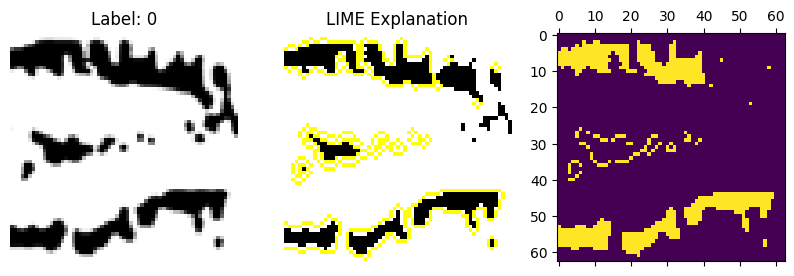

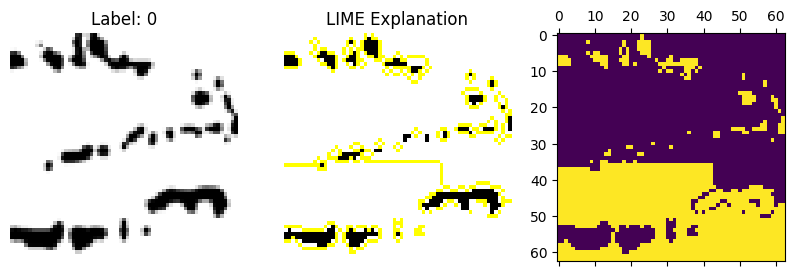

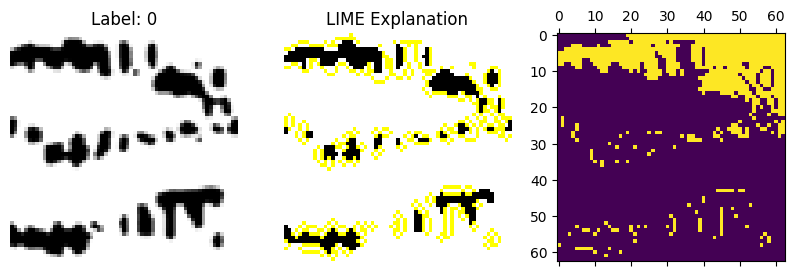

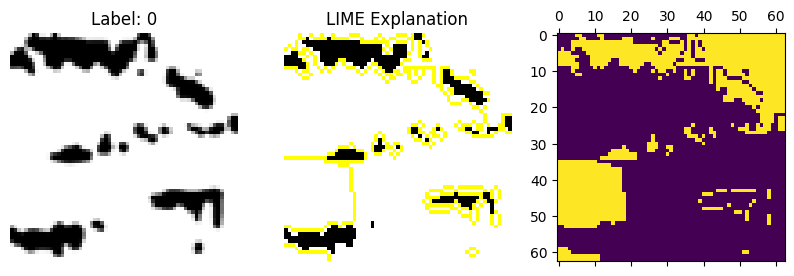

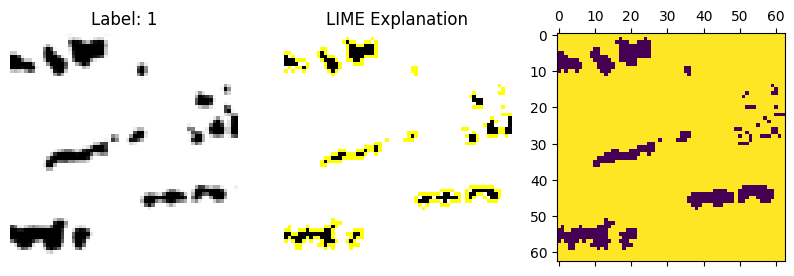

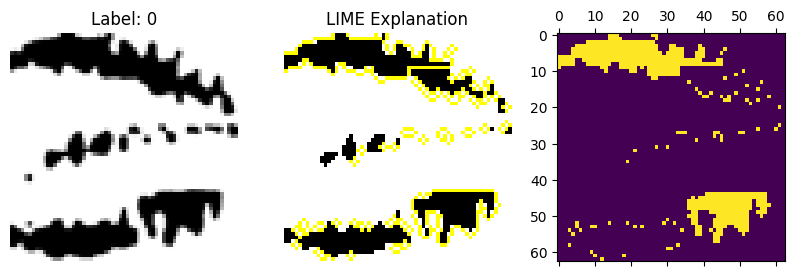

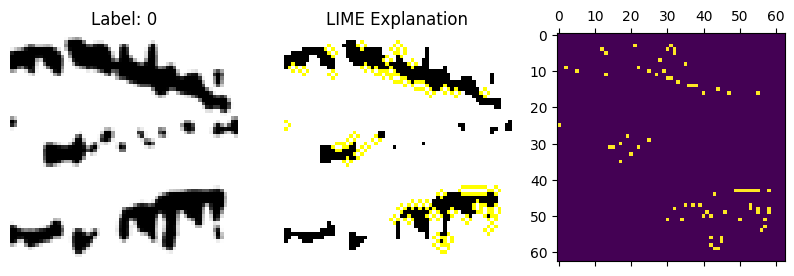

In [ ]:
from skimage.segmentation import mark_boundaries

def predict_fn(images):
    images = images[:,:,:,0] # Extract the first channel if images are RGB
    images = images.reshape(images.shape[0], 63,63, 1) # Reshape to match autoencoder input
    features = model.predict(images)
    return features.reshape(features.shape[0], -1) # Reshape to (num_samples, num_features)

explainer = lime_image.LimeImageExplainer()

i = 0

for image in images:
  sample_image = cv2.cvtColor((image.reshape(63,63, 1) * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
  with SuppressOutput():
    explanation = explainer.explain_instance(
        sample_image.astype('double'),
        predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )
    

    # Get the image and mask for the top label
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

  # Display the original image and the LIME explanation
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
  ax1.imshow(sample_image[:,:,0].reshape(63, 63), cmap='gray')
  ax1.set_title("Label: " + str(labels[i]))
  ax1.axis('off')

  ax2.imshow(mark_boundaries(temp, mask))
  ax2.set_title('LIME Explanation')
  ax2.axis('off')

  ax3.matshow(mask)
  i+=1

plt.show()

## Grad-CAM Implementation

### import libraries and packages

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


### Function to Compute Grad-CAM

In [ ]:
def get_gradcam_heatmap(model, img, class_index, last_conv_layer_name="conv2d_1"):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = Model(inputs=[model.inputs], outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    
    # Compute the gradient of the top predicted class for the output feature map
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(img, axis=0))
        loss = predictions[:, class_index]

    # Compute gradients with respect to the conv layer
    grads = tape.gradient(loss, conv_outputs)
    
    # Compute the mean intensity of the gradient over each channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Weigh the conv layer outputs with the computed gradients
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap between 0 and 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    
    return heatmap


### Overlay Heatmap on Image

In [ ]:
def display_gradcam(img, heatmap, alpha=0.4):
    # Resize heatmap to the size of the image
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.resize(heatmap, (img.shape[0], img.shape[1]))

    # Convert heatmap to RGB
    heatmap = plt.cm.jet(heatmap)[:, :, :3]  # Use jet colormap
    heatmap = np.uint8(heatmap * 255)

    # Overlay the heatmap on the image
    overlay_img = heatmap * alpha + img.squeeze() * 255  # Rescale input img
    plt.imshow(overlay_img.astype(np.uint8))
    plt.axis('off')
    plt.show()


### Generating Grad-CAM Explanation

In [ ]:
'''
# Pick a test image
test_img = X_test[0]  # Replace with any index to visualize other images
test_img_label = y_test[0]

# Get the model prediction for the image
predicted_class = int(model.predict(np.expand_dims(test_img, axis=0)) > 0.5)

# Compute the Grad-CAM heatmap
heatmap = get_gradcam_heatmap(model, test_img, predicted_class, last_conv_layer_name="conv2d_1")

# Display the heatmap overlayed on the image
display_gradcam(test_img, heatmap)
'''


'\n# Pick a test image\ntest_img = X_test[0]  # Replace with any index to visualize other images\ntest_img_label = y_test[0]\n\n# Get the model prediction for the image\npredicted_class = int(model.predict(np.expand_dims(test_img, axis=0)) > 0.5)\n\n# Compute the Grad-CAM heatmap\nheatmap = get_gradcam_heatmap(model, test_img, predicted_class, last_conv_layer_name="conv2d_1")\n\n# Display the heatmap overlayed on the image\ndisplay_gradcam(test_img, heatmap)\n'